In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv("IRIS.csv")

In [25]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import metrics

In [5]:
df['species'].replace(['Iris-versicolor', 'Iris-virginica','Iris-setosa'],[0, 1,2], inplace=True)

In [6]:
x = df.drop('species', axis=1)
y= df.species
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [10]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print((metrics.accuracy_score(y_test, y_pred))*100)

96.66666666666667


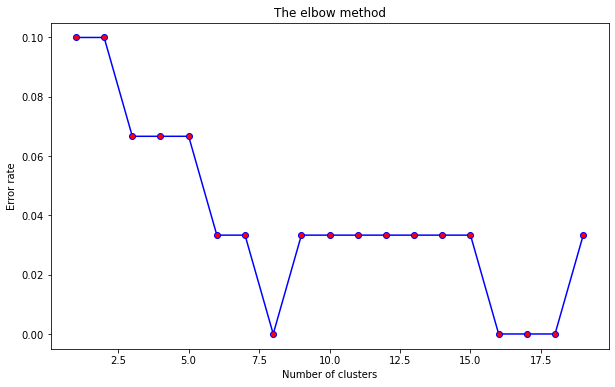

In [14]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred !=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), error_rate,color="blue",marker="o",markersize=6,markerfacecolor="red")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Error rate') 
plt.show()


In [26]:
print(x_test.iloc[1:2,])
print("prediction")
print(knn.predict(x_test.iloc[1:2,]))
print("Actual")
print(y_test.iloc[1:2,])

     sepal_length  sepal_width  petal_length  petal_width
134           6.1          2.6           5.6          1.4
prediction
[1]
Actual
134    1
Name: species, dtype: int64


In [20]:
print(x_test.iloc[5:6,])
print("prediction")
print(knn.predict(x_test.iloc[5:6,]))

    sepal_length  sepal_width  petal_length  petal_width
57           4.9          2.4           3.3          1.0
prediction
[0]


In [21]:
print(y_test.iloc[5:6,])

57    0
Name: species, dtype: int64
